<a href="https://colab.research.google.com/github/dylan96dashintha/ml_project_pump_it_up/blob/main/final_ml_project_cleaning_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve, KFold, train_test_split
from sklearn import naive_bayes
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler
from sklearn.utils import resample
from sklearn.metrics import f1_score, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from xgboost import XGBClassifier

from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

#read the data
features_df = pd.read_csv('/content/drive/My Drive/ML_project/Dataset/training_set.csv', index_col="id")
labels_df = pd.read_csv('/content/drive/My Drive/ML_project/Dataset/training_labels.csv', index_col="id")
test_features_df = pd.read_csv('/content/drive/My Drive/ML_project/Dataset/test_set.csv', index_col="id")
submittion_set = pd.read_csv('/content/drive/My Drive/ML_project/Dataset/SubmissionFormat.csv')

In [ ]:
train_len = len(features_df)
dataset =  pd.concat(objs=[features_df, test_features_df], axis=0).reset_index(drop=True)
df = dataset.copy()
df['status_group'] = labels_df['status_group']

In [ ]:
train_len

59400

In [ ]:
dataset.shape

(74250, 39)

In [ ]:
df.shape

(74250, 40)

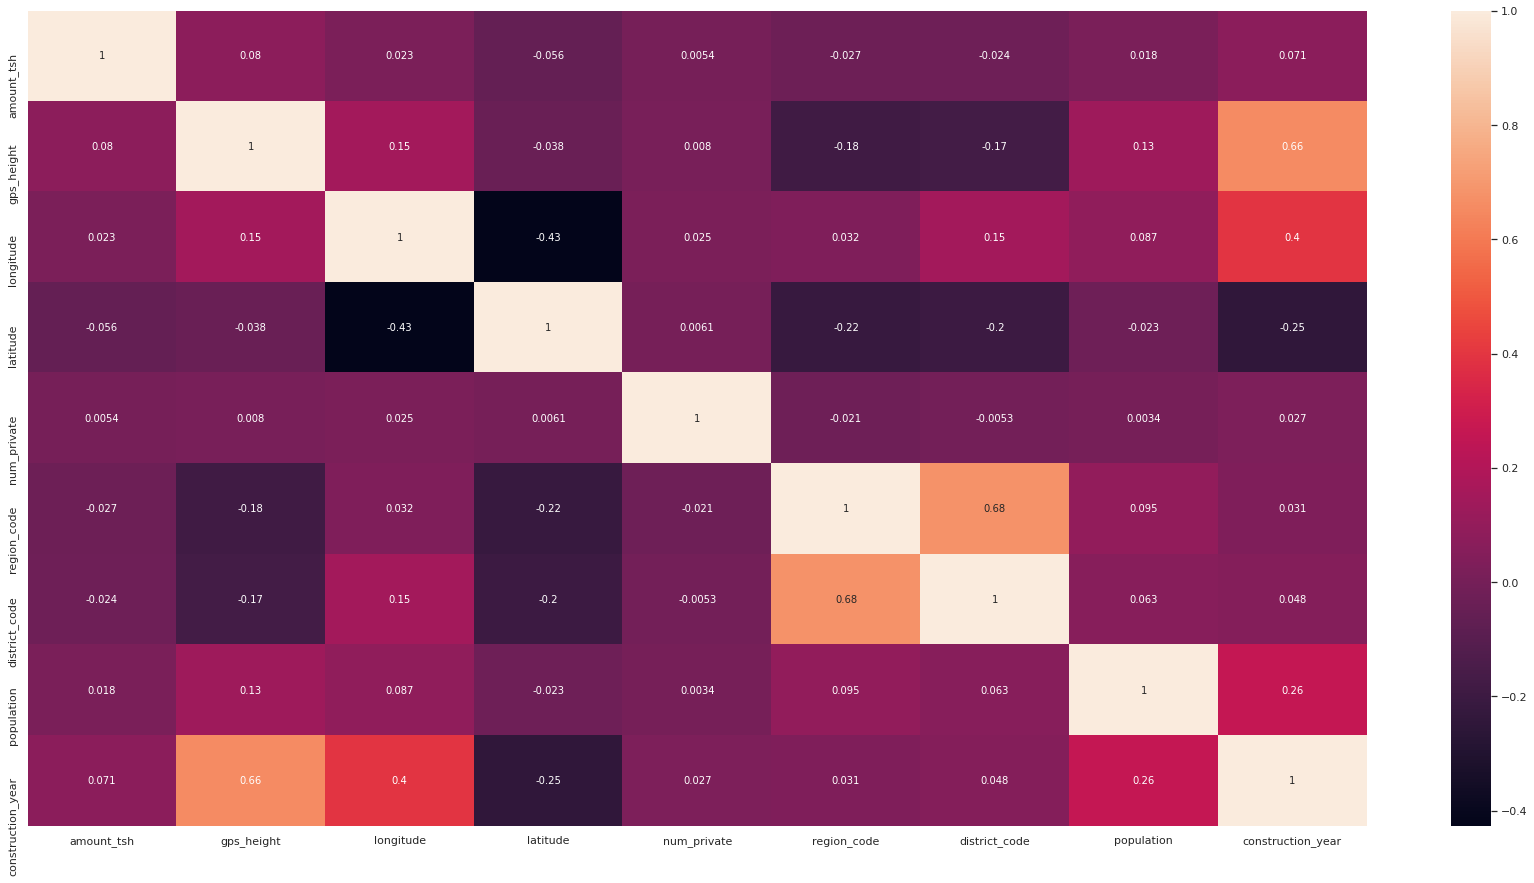

In [ ]:
plt.figure(figsize=[30,15])
sns.heatmap(df.corr(), annot=True)

# Pre processing data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             74250 non-null  float64
 1   date_recorded          74250 non-null  object 
 2   funder                 69746 non-null  object 
 3   gps_height             74250 non-null  int64  
 4   installer              69718 non-null  object 
 5   longitude              74250 non-null  float64
 6   latitude               74250 non-null  float64
 7   wpt_name               74250 non-null  object 
 8   num_private            74250 non-null  int64  
 9   basin                  74250 non-null  object 
 10  subvillage             73780 non-null  object 
 11  region                 74250 non-null  object 
 12  region_code            74250 non-null  int64  
 13  district_code          74250 non-null  int64  
 14  lga                    74250 non-null  object 
 15  wa

In [ ]:
#null values in the dataset
df.isna().sum()

amount_tsh                   0
date_recorded                0
funder                    4504
gps_height                   0
installer                 4532
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 470
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            4155
recorded_by                  0
scheme_management         4846
scheme_name              35258
permit                    3793
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [ ]:
df['scheme_management'].value_counts()

VWC                 45917
WUG                  6496
Water authority      3975
WUA                  3551
Water Board          3462
Parastatal           2124
Company              1341
Private operator     1326
Other                 996
SWC                   123
Trust                  92
None                    1
Name: scheme_management, dtype: int64

In [ ]:
df['management'].value_counts()

vwc                 50624
wug                  8108
water board          3688
wua                  3118
private operator     2504
parastatal           2229
water authority      1123
other                1083
company               859
unknown               683
other - school        126
trust                 105
Name: management, dtype: int64

As these scheme_management reperestns who operates the water point and the 'management' represents how the water point is managed. As the scheme_management column has 4846 null values I will drop it from the dataset.


In [ ]:
df['quantity'].value_counts()

enough          41522
insufficient    18896
dry              7782
seasonal         5075
unknown           975
Name: quantity, dtype: int64

In [ ]:
df['quantity_group'].value_counts()

enough          41522
insufficient    18896
dry              7782
seasonal         5075
unknown           975
Name: quantity_group, dtype: int64

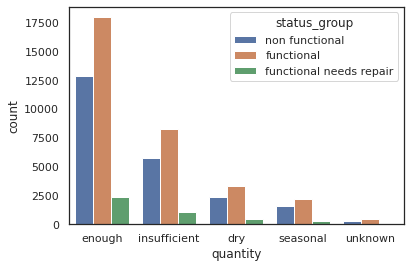

In [ ]:

ax = sns.countplot(x='quantity', hue="status_group", data=df)

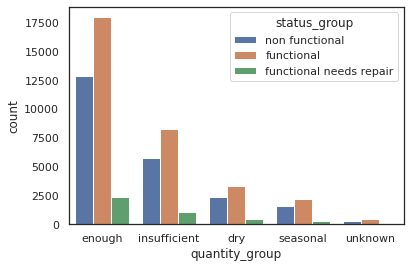

In [ ]:
ax = sns.countplot(x='quantity_group', hue="status_group", data=df)

as these 2 columsn contains same information, decided to drop quantity_group

---



In [ ]:
df['source'].value_counts()

spring                  21216
shallow well            21140
machine dbh             13822
river                   11964
rainwater harvesting     2863
hand dtw                 1108
lake                      950
dam                       840
other                     261
unknown                    86
Name: source, dtype: int64

In [ ]:
df['source_type'].value_counts()

spring                  21216
shallow well            21140
borehole                14930
river/lake              12914
rainwater harvesting     2863
dam                       840
other                     347
Name: source_type, dtype: int64

In [ ]:
df['source_class'].value_counts()

groundwater    57286
surface        16617
unknown          347
Name: source_class, dtype: int64

In [ ]:
df.groupby(['source_class','source']).count()

amount_tsh  ...  status_group
source_class source                            ...              
groundwater  hand dtw                    1108  ...           881
             machine dbh                13822  ...         11092
             shallow well               21140  ...         16885
             spring                     21216  ...         17030
surface      dam                          840  ...           684
             lake                         950  ...           758
             rainwater harvesting        2863  ...          2281
             river                      11964  ...          9515
unknown      other                        261  ...           202
             unknown                       86  ...            72

[10 rows x 38 columns]


It is obvious that these three columns keep same information. so, decided to keep just 'source' column, because it has more detailed information and drop others.

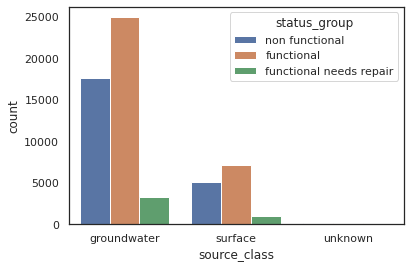

In [ ]:
ax = sns.countplot(x='source_class', hue="status_group", data=df)

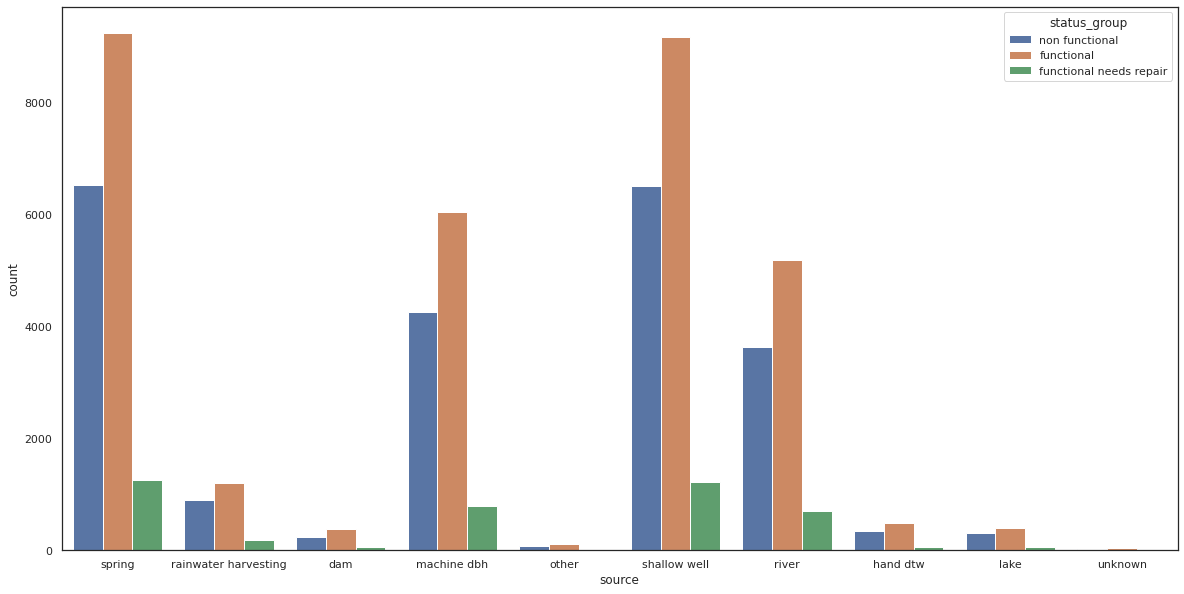

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='source', hue="status_group", data=df)

In [ ]:
df['water_quality'].value_counts()

soft                  63505
salty                  6082
unknown                2345
milky                  1005
coloured                623
salty abandoned         423
fluoride                244
fluoride abandoned       23
Name: water_quality, dtype: int64

In [ ]:

df['quality_group'].value_counts()

good        63505
salty        6505
unknown      2345
milky        1005
colored       623
fluoride      267
Name: quality_group, dtype: int64

As water_quality and quality_group has same information and water_quality has more unique values, I will keep only water_qulity column.

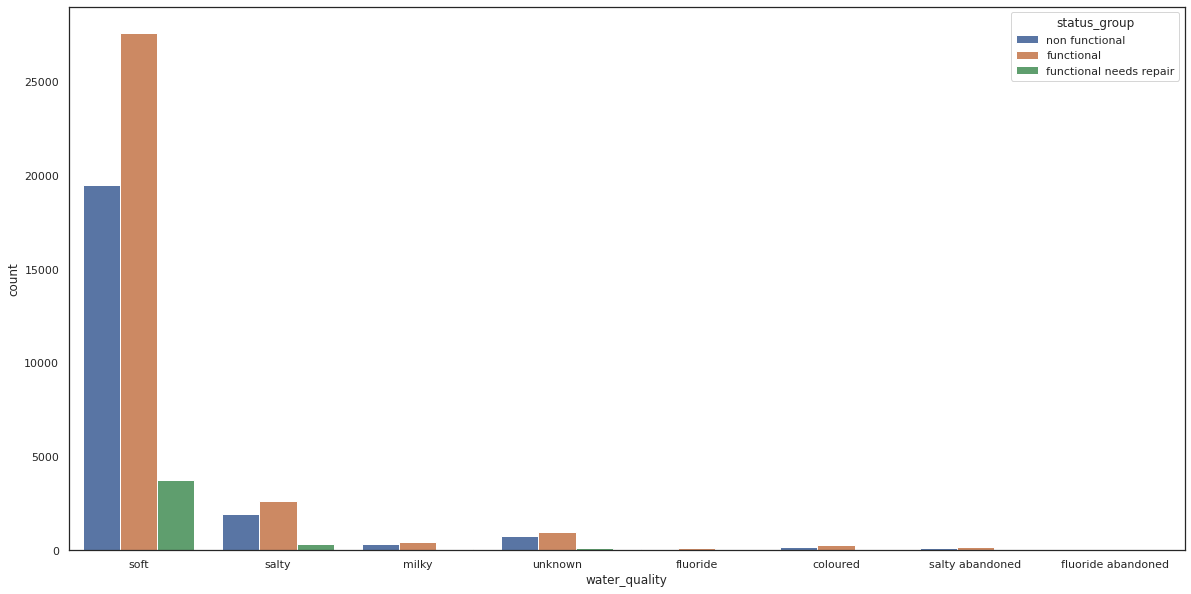

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='water_quality', hue="status_group", data=df)

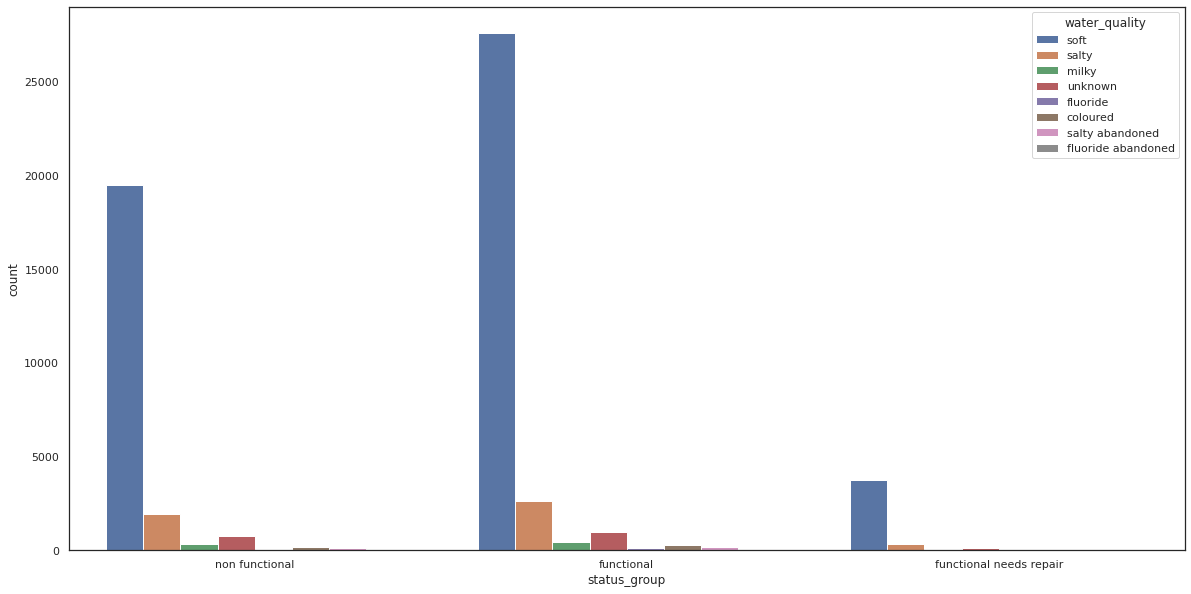

In [ ]:

plt.figure(figsize=(20,10))
ax = sns.countplot(x='status_group', hue="water_quality", data=df)

In [ ]:
df['payment'].value_counts()

never pay                31712
pay per bucket           11266
pay monthly              10397
unknown                  10149
pay when scheme fails     4842
pay annually              4570
other                     1314
Name: payment, dtype: int64

In [ ]:
df['payment_type'].value_counts()

never pay     31712
per bucket    11266
monthly       10397
unknown       10149
on failure     4842
annually       4570
other          1314
Name: payment_type, dtype: int64

As these 2 columns like to be same, we will drop one of them

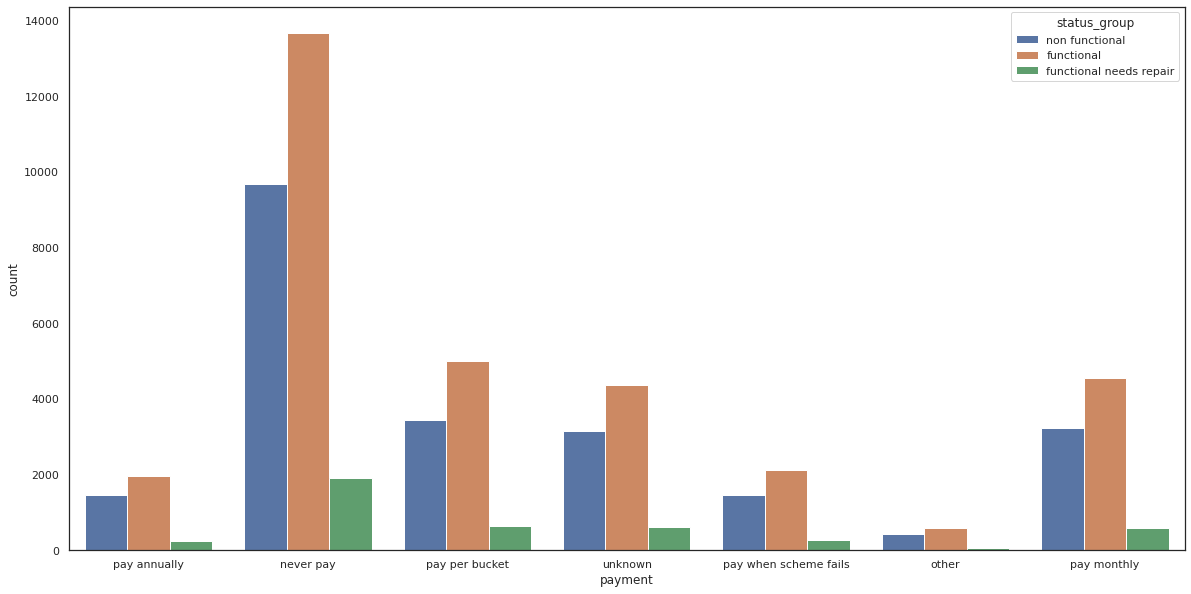

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='payment', hue="status_group", data=df)

In [ ]:
df['extraction_type'].value_counts()

gravity                      33263
nira/tanira                  10205
other                         8102
submersible                   5982
swn 80                        4588
mono                          3628
india mark ii                 3029
afridev                       2208
ksb                           1790
other - rope pump              572
other - swn 81                 284
windmill                       152
india mark iii                 135
cemo                           108
other - play pump              101
walimi                          60
climax                          41
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [ ]:
df['extraction_type_group'].value_counts()

gravity            33263
nira/tanira        10205
other               8102
submersible         7772
swn 80              4588
mono                3628
india mark ii       3029
afridev             2208
rope pump            572
other handpump       447
wind-powered         152
other motorpump      149
india mark iii       135
Name: extraction_type_group, dtype: int64

In [ ]:
df['extraction_type_class'].value_counts()

gravity         33263
handpump        20612
other            8102
submersible      7772
motorpump        3777
rope pump         572
wind-powered      152
Name: extraction_type_class, dtype: int64

In [ ]:
df.groupby(['extraction_type_class', 'extraction_type', 'extraction_type_group']).count()

amount_tsh  ...  status_group
extraction_type_class extraction_type           extraction_type_group              ...              
gravity               gravity                   gravity                     33263  ...         26661
handpump              afridev                   afridev                      2208  ...          1777
                      india mark ii             india mark ii                3029  ...          2429
                      india mark iii            india mark iii                135  ...           111
                      nira/tanira               nira/tanira                 10205  ...          8228
                      other - mkulima/shinyanga other handpump                  2  ...             2
                      other - play pump         other handpump                101  ...            78
                      other - swn 81            other handpump                284  ...           224
                      swn 80                    swn 80                       4588  ...          3647
                      walimi                    other handpump                 60  ...            45
motorpump             cemo                      other motorpump               108  ...            89
                      climax                    other motorpump                41  ...            36
                      mono                      mono                         3628  ...          2860
other                 other                     other                        8102  ...          6389
rope pump             other - rope pump         rope pump                     572  ...           453
submersible           ksb                       submersible                  1790  ...          1440
                      submersible               submersible                  5982  ...          4814
wind-powered          windmill                  wind-powered                  152  ...           117

[18 rows x 37 columns]

Decided to use  'extraction_type_group' or 'extraction_type' columns. Although 'extraction_type' has more unique values than 'extraction_type_group', and decided to keep 'extraction_type_group' as the other one has some values with extremely low amount

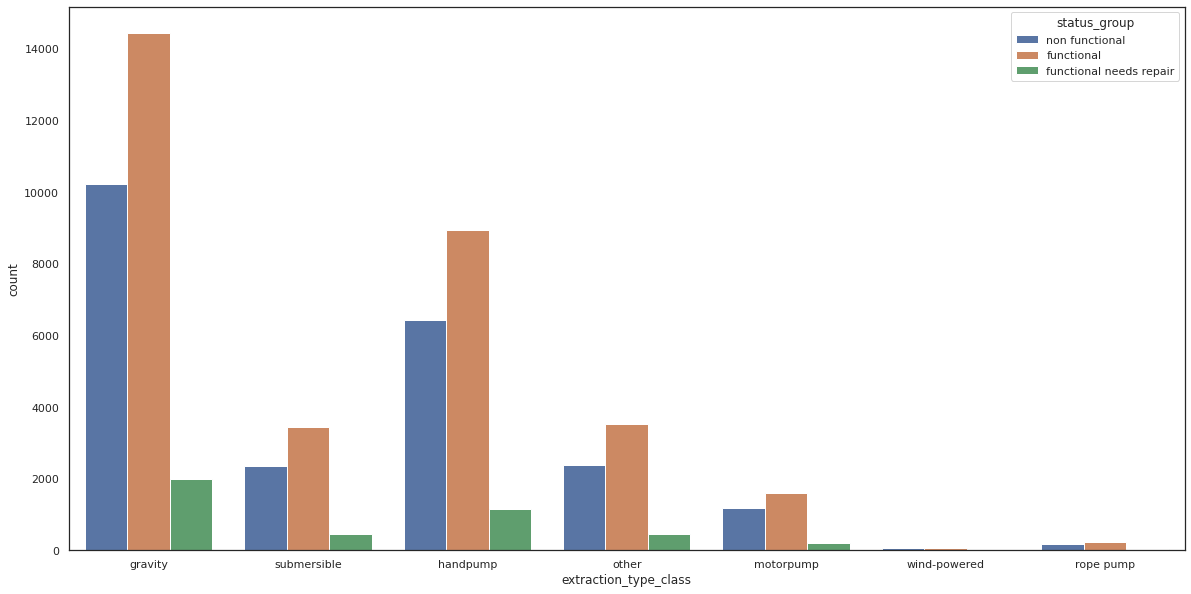

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_class', hue="status_group", data=df)

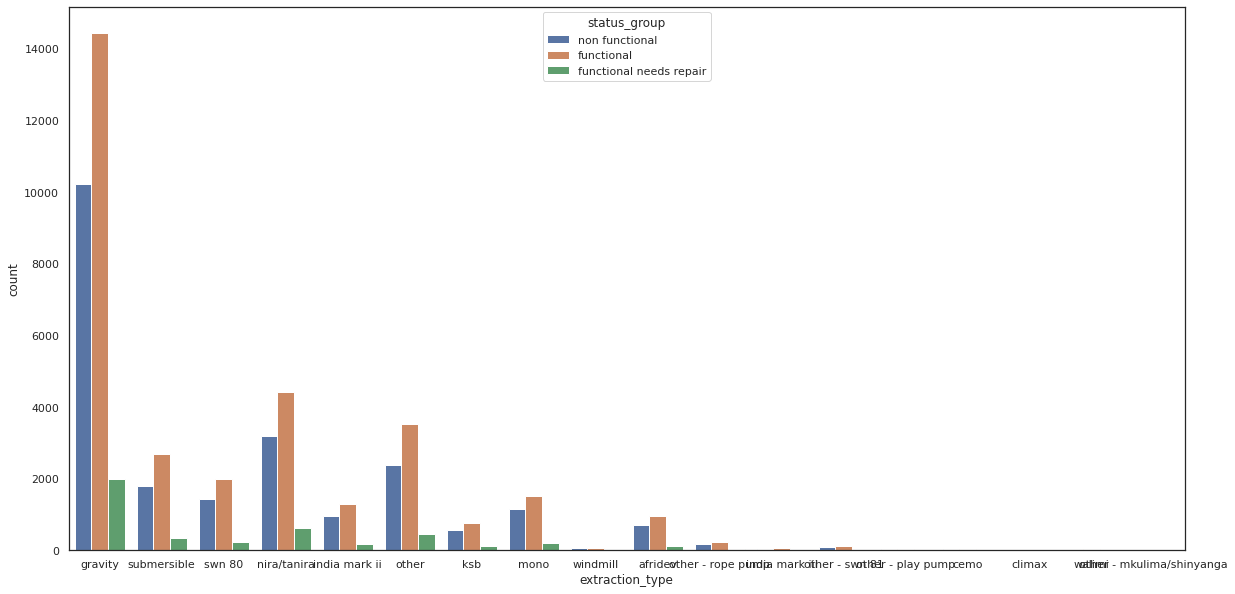

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type', hue="status_group", data=df)

In [ ]:
df['waterpoint_type'].value_counts()

communal standpipe             35628
hand pump                      21884
other                           8010
communal standpipe multiple     7611
improved spring                  959
cattle trough                    150
dam                                8
Name: waterpoint_type, dtype: int64

In [ ]:
df['waterpoint_type_group'].value_counts()

communal standpipe    43239
hand pump             21884
other                  8010
improved spring         959
cattle trough           150
dam                       8
Name: waterpoint_type_group, dtype: int64

Decided to keep 'waterpoint_type' which contains more detail.

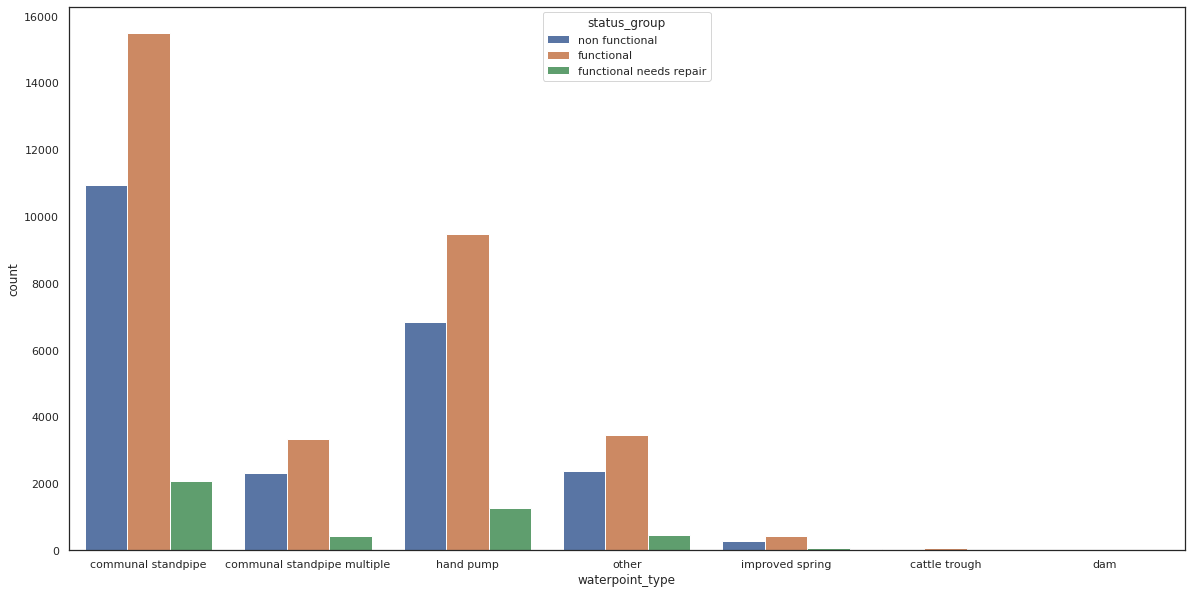

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='waterpoint_type', hue="status_group", data=df)

**Dropping Columns**

In [ ]:
df.drop(columns=['management_group','scheme_management','quantity_group','source_class','source_type','quality_group',
                'payment_type','extraction_type_class','extraction_type', 'waterpoint_type_group'],inplace=True )

In [ ]:

df['construction_year'].value_counts()

0       25969
2010     3314
2008     3243
2009     3196
2000     2578
2007     1960
2006     1892
2011     1591
2003     1579
2004     1417
2012     1347
2002     1343
1995     1283
2005     1275
1978     1267
1999     1222
1998     1190
1985     1177
1990     1176
1996     1020
1980     1005
1984      970
1994      940
1982      926
1972      892
1997      821
1974      814
1992      807
1993      745
2001      680
1988      657
1983      594
1975      561
1986      553
1976      525
1970      493
1991      407
1989      396
1987      370
1981      291
1977      247
1979      245
1973      227
2013      209
1971      177
1960      124
1963      107
1967      106
1968       93
1969       77
1964       48
1962       36
1961       28
1965       21
1966       19
Name: construction_year, dtype: int64

In [ ]:
df['decade'] = df['construction_year'] #creating new columns

In [ ]:
df['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
df['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
df['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
df['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
df['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
df['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

Decided to convert the construction year according to decade

In [ ]:
df['decade'].value_counts()

0      25969
00s    19163
90s     9611
80s     6939
10s     6461
70s     5448
60s      659
Name: decade, dtype: int64

In [ ]:
df.loc[df['construction_year']!=0].describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,48281.000000,48281.000000,48281.000000,48281.000000,48281.000000,48281.000000,48281.000000,48281.000000,48281.000000
mean,469.739275,1000.202709,35.986840,-6.237147,0.693088,15.669559,5.967006,271.572233,1996.870943
std,3456.533934,618.538809,2.559941,2.760997,14.240205,20.937445,10.709279,552.329367,12.440524
min,0.000000,-63.000000,29.607122,-11.649440,0.000000,2.000000,1.000000,0.000000,1960.000000
25%,0.000000,369.000000,34.676387,-8.744394,0.000000,4.000000,2.000000,30.000000,1988.000000
50%,0.000000,1153.000000,36.653857,-6.078797,0.000000,10.000000,3.000000,150.000000,2000.000000
75%,200.000000,1486.000000,37.814225,-3.654467,0.000000,16.000000,5.000000,312.000000,2008.000000
max,350000.000000,2777.000000,40.345193,-1.042375,1776.000000,99.000000,63.000000,30500.000000,2013.000000


In [ ]:
df['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)

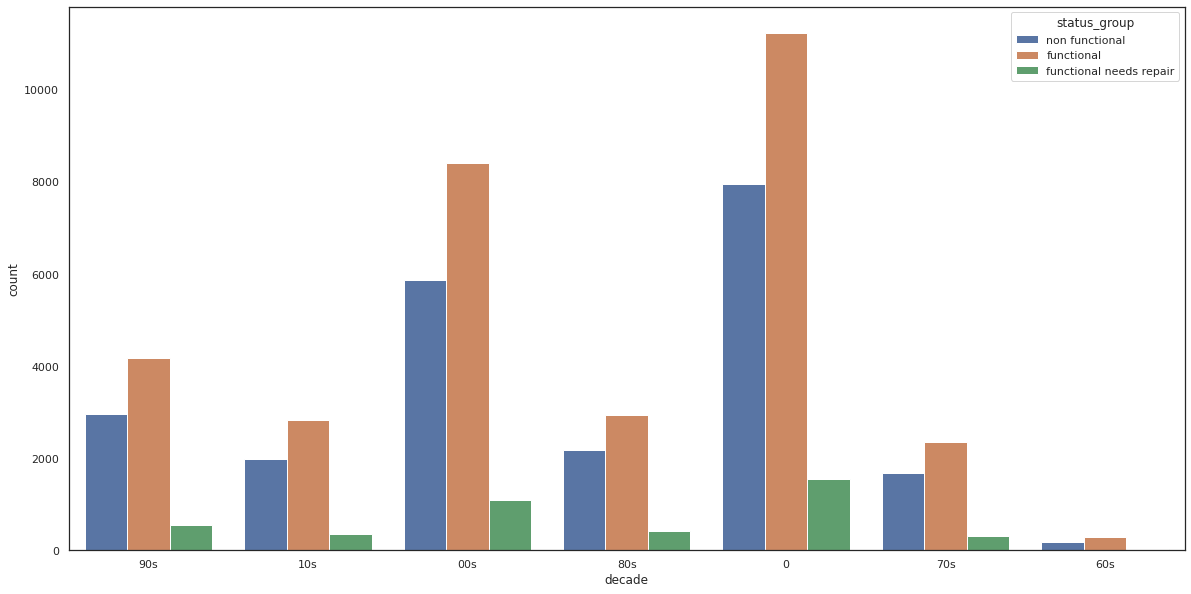

In [ ]:

plt.figure(figsize=(20,10))
ax = sns.countplot(x='decade', hue="status_group", data=df)

In [ ]:
df['recorded_by'].value_counts()

GeoData Consultants Ltd    74250
Name: recorded_by, dtype: int64

As all the values are same I dropped this columns

In [ ]:
df.drop(columns=['recorded_by'],inplace=True )

In [ ]:
df['installer'].value_counts()

DWE                        21751
Government                  2282
RWE                         1498
Commu                       1347
DANIDA                      1305
                           ...  
LEI                            1
Kindoroko water project        1
malola                         1
MASWI DRILLING CO. LTD         1
SEMA Consultant                1
Name: installer, Length: 2410, dtype: int64

In [ ]:
df['installer'].fillna(value='Unknown',inplace=True) 

In [ ]:
df['installer'].replace(to_replace = '0', value ='Unknown' , inplace=True)

In [ ]:
# Replacing the spelling mistakes and collect same categories in same name

df['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

df['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
df['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

df['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

df['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

df['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

df['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

df['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
df['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

df['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

df['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

df['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

df['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)
df['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
df['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
df['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
df['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
df['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
df['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
df['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
df['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
df['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
df['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)


As the installer columns has lots of spelling mistakes and some values are differnt because of use of uppercase leeters in different places in the word.So I replace it with unique name.

In [ ]:
df['installer'].value_counts().head(20)

DWE                   21751
Unknown                5516
Government             3337
Community              2112
DANIDA                 1995
HESAWA                 1749
RWE                    1498
District council       1449
Central government     1359
KKKT                   1120
TCRS                    887
world vision            846
CES                     765
Fini Water              732
RC Church               586
villagers               514
TASAF                   504
LGA                     501
WEDECO                  496
Unicef                  421
Name: installer, dtype: int64

In [ ]:
df.loc[df['longitude']==0]

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_name,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,status_group,decade
21,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,Lake Victoria,Ibabachegu,Shinyanga,17,1,Bariadi,Ikungulyabashashi,0,NaN,NaN,False,2000,swn 80,wug,unknown,unknown,unknown,shallow well,hand pump,non functional,0
53,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,0,Lake Victoria,Center,Mwanza,19,6,Geita,Nyang'hwale,0,True,Nyang'hwale,True,2000,submersible,vwc,unknown,unknown,dry,machine dbh,communal standpipe multiple,NaN,0
168,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,Lake Victoria,Ilula,Shinyanga,17,1,Bariadi,Chinamili,0,False,NaN,False,2000,gravity,parastatal,other,soft,seasonal,rainwater harvesting,communal standpipe,functional,0
177,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,Lake Victoria,Mahaha,Shinyanga,17,1,Bariadi,Bunamhala,0,NaN,NaN,False,2000,other,wug,unknown,soft,enough,shallow well,other,non functional,0
253,0.0,2012-10-29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,0,Lake Victoria,Nyamatala,Mwanza,19,2,Magu,Malili,0,True,NaN,True,2000,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,non functional,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74049,0.0,2011-08-08,Nyamigogo,0,MASWI,0.0,-2.000000e-08,Husein,0,Lake Victoria,Nyaweshi,Mwanza,19,6,Geita,Kharumwa,0,True,Borehole,True,2000,india mark ii,vwc,never pay,soft,insufficient,shallow well,hand pump,NaN,0
74076,0.0,2013-02-16,Dwsp,0,DWE,0.0,-2.000000e-08,Imalanota,0,Lake Victoria,Busumabwi,Mwanza,17,1,Magu,Nkungulu,0,False,NaN,False,2000,swn 80,wug,other,soft,enough,shallow well,hand pump,functional,0
74166,0.0,2012-11-04,Government Of Tanzania,0,RWE,0.0,-2.000000e-08,Ofisini,0,Lake Victoria,Madukani,Mwanza,19,2,Magu,Mkula,0,True,Kalemela Water Supply,True,2000,gravity,vwc,never pay,soft,insufficient,lake,communal standpipe multiple,functional,0
74231,0.0,2012-10-26,Hesawa,0,DWE,0.0,-2.000000e-08,Kwa Masilili,0,Lake Victoria,Solima A,Mwanza,19,2,Magu,Kabita,0,True,NaN,True,2000,nira/tanira,vwc,never pay,salty,enough,shallow well,hand pump,NaN,0


In [ ]:
df.loc[df['longitude']!=0].describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,71981.000000,71981.000000,71981.000000,71981.000000,71981.000000,71981.000000,71981.000000,71981.000000,71981.000000
mean,328.731381,686.650616,35.148358,-5.881503,0.476904,15.185091,5.728248,186.448493,1997.901196
std,2951.661960,693.280413,2.608924,2.808758,11.718023,17.775842,9.768536,477.341984,10.294211
min,0.000000,-90.000000,29.607122,-11.649440,0.000000,1.000000,0.000000,0.000000,1960.000000
25%,0.000000,0.000000,33.277747,-8.632576,0.000000,5.000000,2.000000,0.000000,1995.000000
50%,0.000000,418.000000,35.007072,-5.173950,0.000000,12.000000,3.000000,35.000000,2000.000000
75%,30.000000,1330.000000,37.237383,-3.371872,0.000000,17.000000,5.000000,230.000000,2005.000000
max,350000.000000,2777.000000,40.345193,-0.998464,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [ ]:
df['longitude'].replace(to_replace = 0 , value =35.15, inplace=True) # changing 0 values to mean

Replace the zero values in the logitude column with the mean 

In [ ]:
df['wpt_name'].value_counts()

none                    4440
Shuleni                 2183
Zahanati                1034
Msikitini                647
Kanisani                 390
                        ... 
Kwa Mjumbe Mkemi           1
Kwa Mzee Bonanza           1
Salage Secschool           1
Old Traford                1
Kwa Aloyce Mangalili       1
Name: wpt_name, Length: 45684, dtype: int64

In [ ]:
df['scheme_name'].value_counts()

K                             858
None                          794
Borehole                      704
Chalinze wate                 501
M                             490
                             ... 
Kilimb                          1
Government Borehole Scheme      1
Kibo sterio water supply        1
BFFS water supplying            1
Tanload                         1
Name: scheme_name, Length: 2868, dtype: int64

In [ ]:
df.drop(columns=['wpt_name','scheme_name','region_code'],inplace=True )

Those columns have dropped due to having large unique values and null values

In [ ]:
df['region'].value_counts()

Iringa           6599
Shinyanga        6293
Mbeya            5758
Kilimanjaro      5494
Morogoro         5038
Kagera           4174
Arusha           4111
Mwanza           3897
Kigoma           3533
Pwani            3331
Ruvuma           3306
Tanga            3186
Dodoma           2779
Singida          2536
Tabora           2466
Mara             2451
Rukwa            2242
Mtwara           2144
Manyara          1972
Lindi            1920
Dar es Salaam    1020
Name: region, dtype: int64

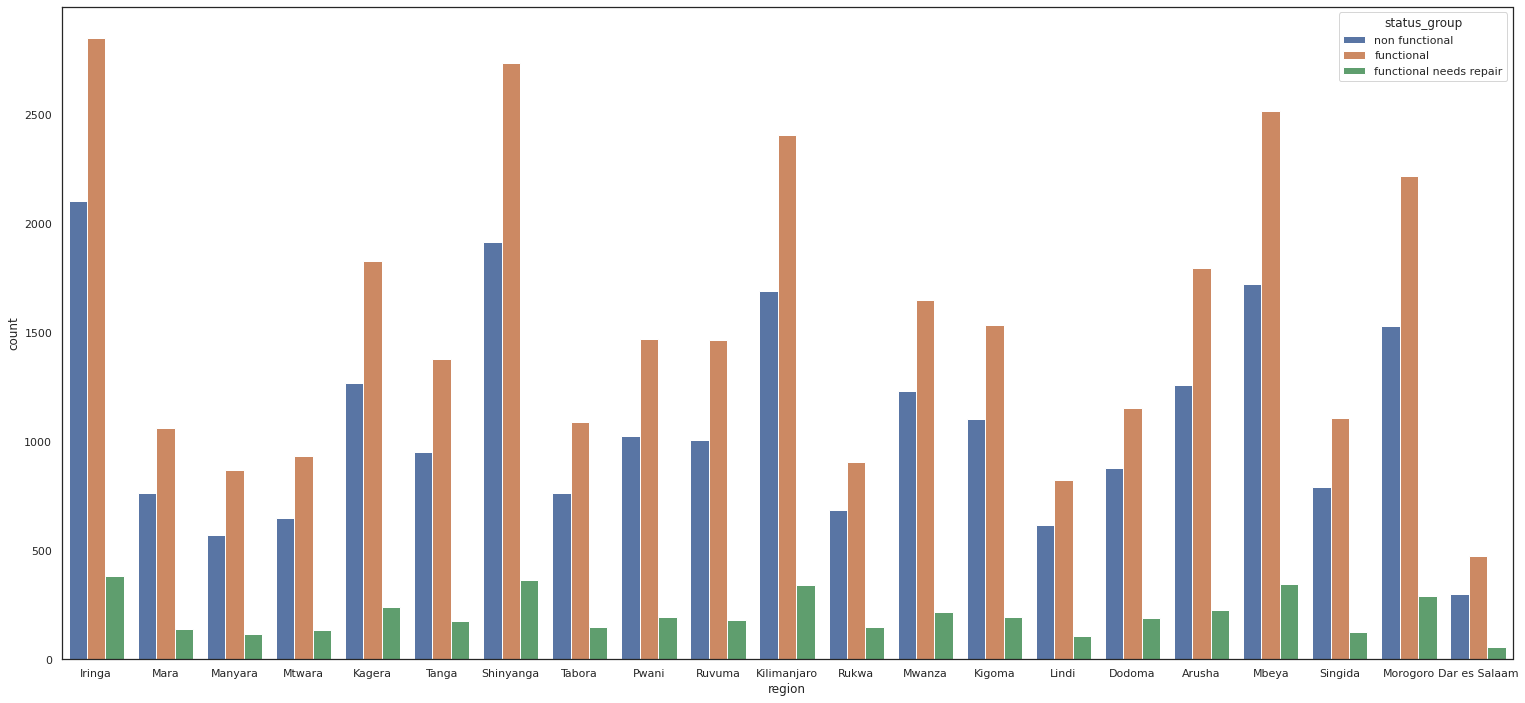

In [ ]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='region', hue="status_group", data=df)

In [ ]:
df['population'].value_counts()

0       26834
1        8782
200      2370
150      2328
250      2087
        ...  
1193        1
593         1
1065        1
785         1
895         1
Name: population, Length: 1128, dtype: int64

In [ ]:
df.loc[df['population']==0].groupby('status_group').count()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade
status_group,,,,,,,,,,,,,,,,,,,,,,,,,,
functional,11613,11613,10457,11613,11613,11613,11613,11613,11613,11422,11613,11613,11613,11613,11613,11104,11031,11613,11613,11613,11613,11613,11613,11613,11613,11613
functional needs repair,1588,1588,1424,1588,1588,1588,1588,1588,1588,1561,1588,1588,1588,1588,1588,1497,1500,1588,1588,1588,1588,1588,1588,1588,1588,1588
non functional,8227,8227,7419,8227,8227,8227,8227,8227,8227,8083,8227,8227,8227,8227,8227,7861,7796,8227,8227,8227,8227,8227,8227,8227,8227,8227


In [ ]:
df.loc[df['population']!=0].describe()

,amount_tsh,gps_height,longitude,latitude,num_private,district_code,population,construction_year
count,47416.000000,47416.000000,47416.000000,47416.000000,47416.000000,47416.000000,47416.000000,47416.000000
mean,447.783038,967.471254,36.078646,-6.140993,0.723975,6.300405,283.042623,1996.964379
std,3592.900978,612.979582,2.587554,2.736761,14.431650,11.327183,564.413842,12.397505
min,0.000000,-90.000000,29.607122,-11.649440,0.000000,1.000000,1.000000,1960.000000
25%,0.000000,344.000000,34.715217,-8.383484,0.000000,2.000000,40.000000,1988.000000
50%,0.000000,1133.000000,36.714568,-5.765866,0.000000,3.000000,150.000000,2000.000000
75%,100.000000,1461.000000,37.949838,-3.600882,0.000000,5.000000,328.000000,2008.000000
max,350000.000000,2777.000000,40.345193,-1.042375,1776.000000,67.000000,30500.000000,2013.000000


In [ ]:
df['population'].replace(to_replace = 0 , value =281, inplace=True)

replace the missing values with mean

In [ ]:

df.drop(columns=['date_recorded'],inplace=True )

In [ ]:

df['subvillage'].nunique()

21425

This column has location value of water point regions but df already have region column, will drop this, because it is hard to handle this nunique object values.

In [ ]:

df.drop(columns=['subvillage'],inplace=True )

In [ ]:
df['public_meeting'].value_counts()

True     63749
False     6346
Name: public_meeting, dtype: int64

In [ ]:
df['public_meeting'].fillna(value=True,inplace=True)

In [ ]:
df['permit'].value_counts()

True     48606
False    21851
Name: permit, dtype: int64

In [ ]:
df['permit'].fillna(value=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             74250 non-null  float64
 1   funder                 69746 non-null  object 
 2   gps_height             74250 non-null  int64  
 3   installer              74250 non-null  object 
 4   longitude              74250 non-null  float64
 5   latitude               74250 non-null  float64
 6   num_private            74250 non-null  int64  
 7   basin                  74250 non-null  object 
 8   region                 74250 non-null  object 
 9   district_code          74250 non-null  int64  
 10  lga                    74250 non-null  object 
 11  ward                   74250 non-null  object 
 12  population             74250 non-null  int64  
 13  public_meeting         74250 non-null  bool   
 14  permit                 74250 non-null  bool   
 15  co

In [ ]:
df['funder'] = pd.factorize(df['funder'])[0]
df['installer'] = pd.factorize(df['installer'])[0]
df['decade'] = pd.factorize(df['decade'])[0]
df['basin'] = pd.factorize(df['basin'])[0]
df['region'] = pd.factorize(df['region'])[0]
df['lga'] = pd.factorize(df['lga'])[0]
df['ward'] = pd.factorize(df['ward'])[0]
df['extraction_type_group'] = pd.factorize(df['extraction_type_group'])[0]
df['management'] = pd.factorize(df['management'])[0]
df['payment'] = pd.factorize(df['payment'])[0]
df['water_quality'] = pd.factorize(df['water_quality'])[0]
df['quantity'] = pd.factorize(df['quantity'])[0]
df['source'] = pd.factorize(df['source'])[0]
df['waterpoint_type'] = pd.factorize(df['waterpoint_type'])[0]

# df['funder'] = df['funder'].astype("category")
# df = pd.get_dummies(df, columns= ['funder'], prefix='f')
# df['installer'] = df['installer'].astype("category")
# df = pd.get_dummies(df, columns= ['installer'], prefix='i')
# df['decade'] = df['decade'].astype("category")
# df = pd.get_dummies(df, columns= ['decade'], prefix='d')
# df['basin'] = df['basin'].astype("category")
# df = pd.get_dummies(df, columns= ['basin'], prefix='b')
# df['region'] = df['region'].astype("category")
# df = pd.get_dummies(df, columns= ['region'], prefix='r')
# df['lga'] = df['lga'].astype("category")
# df = pd.get_dummies(df, columns= ['lga'], prefix='c')
# df['ward'] = df['ward'].astype("category")
# df = pd.get_dummies(df, columns= ['ward'], prefix='w')
# df['extraction_type_group'] = df['extraction_type_group'].astype("category")
# df = pd.get_dummies(df, columns= ['extraction_type_group'], prefix='e')
# df['management'] = df['management'].astype("category")
# df = pd.get_dummies(df, columns= ['management'], prefix='m')
# df['payment'] = df['payment'].astype("category")
# df = pd.get_dummies(df, columns= ['payment'], prefix='p')
# df['water_quality'] = df['water_quality'].astype("category")
# df = pd.get_dummies(df, columns= ['water_quality'], prefix='wq')
# df['quantity'] = df['quantity'].astype("category")
# df = pd.get_dummies(df, columns= ['quantity'], prefix='q')
# df['source'] = df['source'].astype("category")
# df = pd.get_dummies(df, columns= ['source'], prefix='s')
# df['waterpoint_type'] = df['waterpoint_type'].astype("category")
# df = pd.get_dummies(df, columns= ['waterpoint_type'], prefix='wt')




Done label encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             74250 non-null  float64
 1   funder                 74250 non-null  int64  
 2   gps_height             74250 non-null  int64  
 3   installer              74250 non-null  int64  
 4   longitude              74250 non-null  float64
 5   latitude               74250 non-null  float64
 6   num_private            74250 non-null  int64  
 7   basin                  74250 non-null  int64  
 8   region                 74250 non-null  int64  
 9   district_code          74250 non-null  int64  
 10  lga                    74250 non-null  int64  
 11  ward                   74250 non-null  int64  
 12  population             74250 non-null  int64  
 13  public_meeting         74250 non-null  bool   
 14  permit                 74250 non-null  bool   
 15  co

In [ ]:
df.drop(columns=['status_group'],inplace=True )
X_train = df[:train_len]
test = df[train_len:]

In [ ]:
X_train.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,num_private,basin,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade
0,6000.0,0,1390,0,34.938093,-9.856322,0,0,0,5,0,0,109,True,False,1999,0,0,0,0,0,0,0,0
1,0.0,1,1399,1,34.698766,-2.147466,0,1,1,2,1,1,280,True,True,2010,0,1,1,0,1,1,0,1
2,25.0,2,686,2,37.460664,-3.821329,0,2,2,4,2,2,250,True,True,2009,0,0,2,0,0,2,1,2
3,0.0,3,263,3,38.486161,-11.155298,0,3,3,63,3,3,58,True,True,1986,1,0,1,0,2,3,1,3
4,0.0,4,0,4,31.130847,-1.825359,0,1,4,1,4,4,281,True,True,2000,0,2,1,0,3,1,0,4


In [ ]:
#fill missing values with mean
X_train= X_train.fillna(X_train.mean())
test= test.fillna(X_train.mean())

In [ ]:
df.shape

(74250, 24)

In [ ]:
X_train.shape

(59400, 24)

In [ ]:
test.shape

(14850, 24)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
test = scaler.transform(test)

Standardize features by removing the mean and scaling to unit variance

In [ ]:
y_train = labels_df['status_group']

# Model Training

In [ ]:
kfold = StratifiedKFold(n_splits=10)

In [ ]:
XGBC = XGBClassifier()
xgbc_param_grid = {
   "learning_rate"    : [0.05, 0.1, 0.3] , #[0.1] #[0.3]
   "max_depth"        : [3, 5, 8],  #[5] #[3]
    "n_estimators"  : [100, 150, 200], #[100] #[150]
  #"min_child_weight" : [ 1],   #[] #[1]
   "gamma"            : [ 0.0, 0.1, 0.2], #[0.2] #[0.2]
  #"colsample_bytree" : [1.0 ]   #[] #[1]
    }


gsXGBC = GridSearchCV(XGBC,param_grid =xgbc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsXGBC.fit(X_train,y_train)

XGBC_best = gsXGBC.best_estimator_

# Best score
gsXGBC.best_score_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
predicts_xgb = XGBC_best.predict(test)
submittion_set['status_group'] = predicts_xgb
submittion_set.to_csv('/content/drive/My Drive/ML_project/Dataset/submission_cleaned_data_XGB_onehot.csv', index=False)

In [ ]:
RFC = RandomForestClassifier()
rfc_param_grid = {
   #'bootstrap': [True, False],
   'max_depth': [20, 40, 80], #[20] [20]
   #'max_features': ['auto', 'sqrt'],
   #'min_samples_leaf': [1, 2, 4],
   #'min_samples_split': [2, 5, 10],
   'n_estimators': [1000, 1250, 1500] #[1000] [1250]
    }

gsRFC = GridSearchCV(RFC,param_grid =rfc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
predicts_rfc = RFC_best.predict(test)
submittion_set['status_group'] = predicts_rfc
submittion_set.to_csv('/content/drive/My Drive/ML_project/Dataset/submission_cleaned_data_RFC_onehot.csv', index=False)

In [ ]:
GBC = GradientBoostingClassifier()
gbc_param_grid = {
    #"loss":["deviance"],
    "learning_rate": [0.05, 0.1, 0.2], #[0.1] #[0.1]
    #"min_samples_split": np.linspace(0.1, 0.5, 4),
    #"min_samples_leaf": np.linspace(0.1, 0.5, 4),
    "max_depth":[4 , 5, 6], #[5] #[4]
    #"max_features":["log2","sqrt"],
    #"criterion": ["friedman_mse", "mae"],
    #"subsample":[0.5, 0.8, 0.9, 1.0],
    "n_estimators":[100, 200, 300] #[100] #[200]
    }

gsGBC = GridSearchCV(GBC,param_grid =gbc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

In [ ]:
predicts_gbc = GBC_best.predict(test)
submittion_set['status_group'] = predicts_gbc
submittion_set.to_csv('/content/drive/My Drive/ML_project/Dataset/submission_cleaned_data_GBC_onehot.csv', index=False)